## Approach for relationship extraction in unstructured text
##### Supervised technique (source: https://www.nltk.org/book/ch07.html)
* Goal: Building relationship tuples _(entity, relation, entity)_

### Pipeline architecture

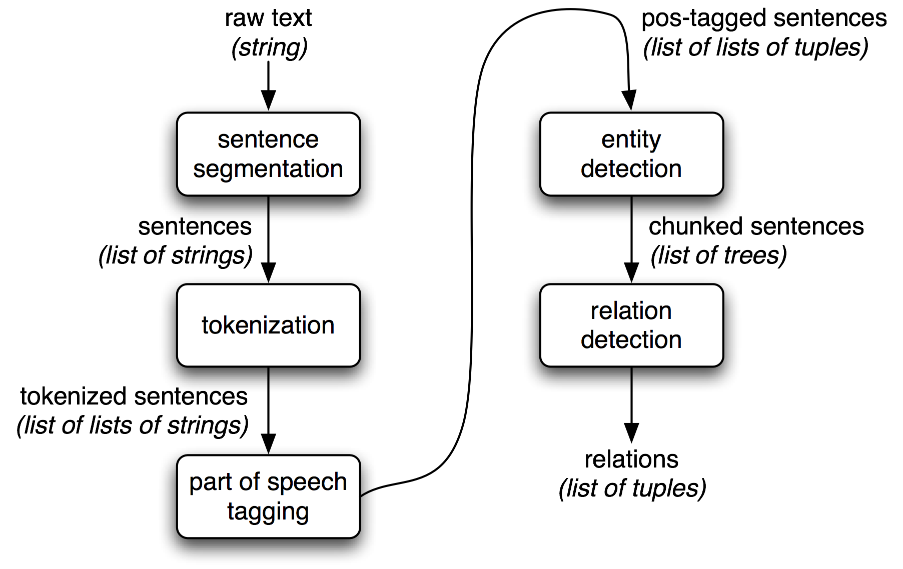

In [5]:
import spacy
import re
import nltk

from nltk.tokenize import word_tokenize, sent_tokenize

In [6]:
nlp = spacy.load('de_core_news_sm')

In [7]:
utterance = u'Meine Enkelin Lisa und mein Enkel Lukas fliegen morgen nach London. Sie sind zum ersten Mal in England.'

### Sentence Segmentation
##### output: sentences (list of strings)

In [8]:
sentences = sent_tokenize(utterance)
sentences

['Meine Enkelin Lisa und mein Enkel Lukas fliegen morgen nach London.',
 'Sie sind zum ersten Mal in England.']

### Tokenization
##### output: tokenized sentences (list of lists of strings)

In [9]:
words = []
for sentence in sentences:
    sentence = re.sub(r'\W', ' ', sentence)  # remove non-word characters
    words.append(word_tokenize(sentence))
    
words

[['Meine',
  'Enkelin',
  'Lisa',
  'und',
  'mein',
  'Enkel',
  'Lukas',
  'fliegen',
  'morgen',
  'nach',
  'London'],
 ['Sie', 'sind', 'zum', 'ersten', 'Mal', 'in', 'England']]

### Tokenization & POS Tagging
##### output: pos-tagged sentences (list of lists of tuples)

### spaCy POS Tagging

In [10]:
utterance = re.sub(r'\W', ' ', utterance)  # remove non-word characters
doc = nlp(utterance)

pos_tagged_sentences = []
for token in doc:
    pos_tuple = (token.text, token.pos_)
    pos_tagged_sentences.append(pos_tuple)

pos_tagged_sentences
#    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
#          token.shape_, token.is_alpha, token.is_stop)

[('Meine', 'DET'),
 ('Enkelin', 'PROPN'),
 ('Lisa', 'PROPN'),
 ('und', 'CONJ'),
 ('mein', 'DET'),
 ('Enkel', 'NOUN'),
 ('Lukas', 'PROPN'),
 ('fliegen', 'VERB'),
 ('morgen', 'ADV'),
 ('nach', 'ADP'),
 ('London', 'PROPN'),
 (' ', 'SPACE'),
 ('Sie', 'PRON'),
 ('sind', 'AUX'),
 ('zum', 'ADP'),
 ('ersten', 'ADJ'),
 ('Mal', 'NOUN'),
 ('in', 'ADP'),
 ('England', 'PROPN')]

### Stanford POS Tagging

In [11]:
from nltk.tag import StanfordPOSTagger
java_path = "C:\\Program Files\\Java\\jdk1.8.0_181\\bin\\java.exe"
os.environ['JAVAHOME'] = java_path

path_to_model = "../models/german-fast.tagger"
path_to_jar = "../models/stanford-postagger.jar"
tagger = StanfordPOSTagger(path_to_model, path_to_jar)
tagger.java_options='-mx4096m'  ### Setting higher memory limit for long sentences

tagger.tag(utterance.split())

c:\program files\python\lib\site-packages\nltk\tag\stanford.py:149: DeprecationWarning: 
The StanfordTokenizer will be deprecated in version 3.2.5.
Please use nltk.tag.corenlp.CoreNLPPOSTagger or nltk.tag.corenlp.CoreNLPNERTagger instead.
  super(StanfordPOSTagger, self).__init__(*args, **kwargs)


[('Meine', 'PPOSAT'),
 ('Enkelin', 'NN'),
 ('Lisa', 'NE'),
 ('und', 'KON'),
 ('mein', 'PPOSAT'),
 ('Enkel', 'NN'),
 ('Lukas', 'NE'),
 ('fliegen', 'VVFIN'),
 ('morgen', 'ADV'),
 ('nach', 'APPR'),
 ('London', 'NE'),
 ('Sie', 'PPER'),
 ('sind', 'VAFIN'),
 ('zum', 'APPRART'),
 ('ersten', 'ADJA'),
 ('Mal', 'NN'),
 ('in', 'APPR'),
 ('England', 'NE')]

### Entity Detection
##### -> output: chunked sentences (list of trees)
Use chunking: segment and label multi-token sequences (see image below)

From inside out: _word tokens_, _POS tags_, _chunks_ (more specific _noun phrase chunks_ or _NP-chunks_)

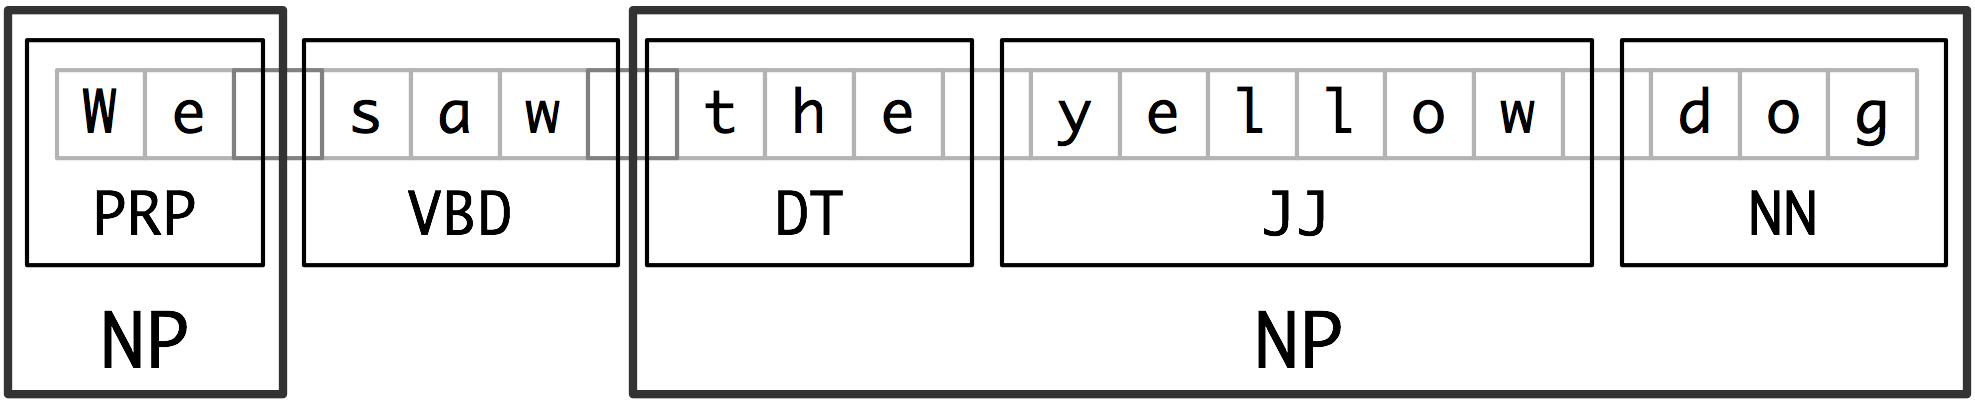

### Create a chunk-parser

Import Ghostscript for printing the parese tree

In [12]:
import os
path_to_gs = "C:/Program Files/gs/gs9.25/bin"
os.environ['PATH'] += os.pathsep + path_to_gs

#### Define the grammar

"_find optional **determinder** followed by any number of **adjectives** and then a **noun**_"

In [15]:
# NLTK POS tags
#grammar = "NP: {<DT>?<JJ>*<NN>}" 
# spaCy POS Tags
#grammar = "NP: {<DET>?<ADJ>*<PROPN>}"
# Stanford NLP POS tags
grammar = "NP: {<NN>*<NE>}"

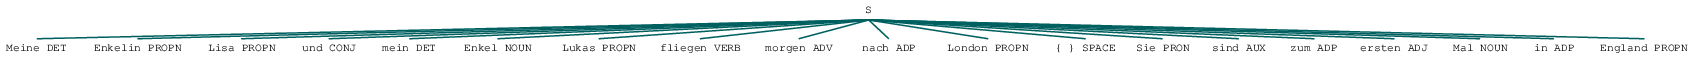

In [16]:
chunk_parser = nltk.RegexpParser(grammar)
result = chunk_parser.parse(pos_tagged_sentences)

result

In [9]:
chunked_sentences = result[:]
chunked_sentences

[Tree('NP', [('Meine', 'DET'), ('Enkelin', 'PROPN')]),
 Tree('NP', [('Lisa', 'PROPN')]),
 ('und', 'CONJ'),
 ('mein', 'DET'),
 ('Enkel', 'NOUN'),
 Tree('NP', [('Lukas', 'PROPN')]),
 ('fliegen', 'VERB'),
 ('morgen', 'ADV'),
 ('nach', 'ADP'),
 Tree('NP', [('London', 'PROPN')]),
 (' ', 'SPACE'),
 ('Sie', 'PRON'),
 ('sind', 'AUX'),
 ('zum', 'ADP'),
 ('ersten', 'ADJ'),
 ('Mal', 'NOUN'),
 ('in', 'ADP'),
 Tree('NP', [('England', 'PROPN')])]

## Stanford Parser

In [24]:
from nltk.parse import stanford
os.environ['STANFORD_PARSER'] = '../models/stanford-parser.jar'
os.environ['STANFORD_MODELS'] = '../models/stanford-german-corenlp-models.jar'

parser = stanford.StanfordParser(model_path="../models/dewac_175m_600.crf.ser.gz")
#sentences = parser.raw_parse_sents(("Hello, My name is Melroy.", "What is your name?"))
#print sentences

# GUI
for line in sentences:
    for sentence in line:
        sentence.draw()

LookupError: 

===========================================================================
  NLTK was unable to find stanford-parser-(\d+)(\.(\d+))+-models\.jar!
  Set the CLASSPATH environment variable.

  For more information, on stanford-parser-(\d+)(\.(\d+))+-models\.jar, see:
    <https://nlp.stanford.edu/software/lex-parser.shtml>
===========================================================================

## Relation detection

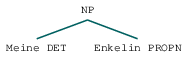

In [13]:
tree1 = chunked_sentences[0]
tree1

In [122]:
IN = re.compile(r'.*')
for rel in nltk.sem.extract_rels('PER', 'LOC', chunked_sentences, pattern = IN):
    print(nltk.sem.rtuple(rel))


---------------------------------------------------

In [ ]:
# Regex grammar
grammar = r"""
  NP: {<DT|PP\$>?<JJ>*<NN>}   # chunk determiner/possessive, adjectives and noun
      {<NNP>+}                # chunk sequences of proper nouns
"""



In [37]:
people = set()
locations = set()
events = set()

for ent in doc.ents:
    #print("Entity: {}, Label: {}".format(ent, ent.label_))
    if ent.label_ == 'PER' or ent.label_ == 'PERSON':
        people.add(ent.text)
    elif ent.label_ == 'LOC':
        locations.add(ent.text)
    elif ent.label == 'EVENT':
        events.add(ent.text)
        
print("People: {}, Locations: {}, Events: {}".format(people, locations, events))

In [114]:
pos_tagged_sentences

[('Meine', 'DET'),
 ('Enkelin', 'PROPN'),
 ('Lisa', 'PROPN'),
 ('und', 'CONJ'),
 ('mein', 'DET'),
 ('Enkel', 'NOUN'),
 ('Lukas', 'PROPN'),
 ('fliegen', 'VERB'),
 ('morgen', 'ADV'),
 ('nach', 'ADP'),
 ('London', 'PROPN'),
 (' ', 'SPACE'),
 ('Sie', 'PRON'),
 ('sind', 'AUX'),
 ('zum', 'ADP'),
 ('ersten', 'ADJ'),
 ('Mal', 'NOUN'),
 ('in', 'ADP'),
 ('England', 'PROPN')]

In [95]:
nltk.download('ieer')
IN = re.compile(r'.*\bin\b(?!\b.+ing)')

[nltk_data] Downloading package ieer to
[nltk_data]     C:\Users\marku\AppData\Roaming\nltk_data...
[nltk_data]   Package ieer is already up-to-date!
<IEERDocument NYT19980315.0063: 'PUBLIC RADIO HOSTS DROP IN AND MAYBE STAY TOO LONG'>
<IEERDocument NYT19980315.0064: 'IN CYBERSPACE, IS THERE LAW WHERE THERE IS NO LAND?'>
<IEERDocument NYT19980315.0067: 'THE SITES: TUNING INTO MUSIC ON THE WEB'>
<IEERDocument NYT19980315.0069: 'ANALYSIS: TAXING INTERNET SALES _ GOVERNORS VS. TAX FREEDOM ACT'>
<IEERDocument NYT19980315.0070: 'A SEARCH ENGINE THAT CHARGES FOR TOP BILLING'>
<IEERDocument NYT19980315.0071: 'COMING SOON: TV DOCUMENTARIES TO A BOOKSTORE NEAR YOU'>
<IEERDocument NYT19980315.0072: 'WEATHER'>
<IEERDocument NYT19980315.0073: 'DICAPRIO , CHARISMATIC STAR, BALKS AT TEEN IDOL IMAGE'>
<IEERDocument NYT19980315.0074: "You've read the book? Now see the television program. Inspired by ``Angela's...">
<IEERDocument NYT19980315.0084: 'A DIRECTOR WHO DARES, AND TAKES THE HEAT'>
<IEERDocume

In [97]:
for doc in nltk.corpus.ieer.parsed_docs('NYT_19980315'):
    print(type(doc))
    for rel in nltk.sem.extract_rels('PER', 'LOC', doc, corpus='ieer', pattern = IN):
        #print(nltk.sem.rtuple(rel))

<class 'nltk.corpus.reader.ieer.IEERDocument'>
<class 'nltk.corpus.reader.ieer.IEERDocument'>
<class 'nltk.corpus.reader.ieer.IEERDocument'>
<class 'nltk.corpus.reader.ieer.IEERDocument'>
<class 'nltk.corpus.reader.ieer.IEERDocument'>
<class 'nltk.corpus.reader.ieer.IEERDocument'>
<class 'nltk.corpus.reader.ieer.IEERDocument'>
<class 'nltk.corpus.reader.ieer.IEERDocument'>
<class 'nltk.corpus.reader.ieer.IEERDocument'>
<class 'nltk.corpus.reader.ieer.IEERDocument'>
<class 'nltk.corpus.reader.ieer.IEERDocument'>
<class 'nltk.corpus.reader.ieer.IEERDocument'>
<class 'nltk.corpus.reader.ieer.IEERDocument'>


### Train word2vec model

In [27]:
import nltk
import re

training_sentences = []
with open('data/robinson_crusoe_section.txt', 'r', encoding='utf-8') as f:
    raw_text = f.read()
    sentences = nltk.sent_tokenize(raw_text)

for sentence in sentences:
    clean_sentence = re.sub('[.?!,]', '', sentence)
    tokenized_sentence = nltk.word_tokenize(sentence)    
    training_sentences.append(tokenized_sentence)

print(training_sentences)

[['Ich', 'bin', 'geboren', 'zu', 'York', 'im', 'Jahre', '1632', ',', 'als', 'Kind', 'angesehener', 'Leute', ',', 'die', 'ursprünglich', 'nicht', 'aus', 'jener', 'Gegend', 'stammten', '.'], ['Mein', 'Vater', ',', 'ein', 'Ausländer', ',', 'aus', 'Bremen', 'gebürtig', ',', 'hatte', 'sich', 'zuerst', 'in', 'Hull', 'niedergelassen', ',', 'war', 'dort', 'als', 'Kaufmann', 'zu', 'hübschem', 'Vermögen', 'gekommen', 'und', 'dann', ',', 'nachdem', 'er', 'sein', 'Geschäft', 'aufgegeben', 'hatte', ',', 'nach', 'York', 'gezogen', '.'], ['Hier', 'heirathete', 'er', 'meine', 'Mutter', ',', 'eine', 'geborene', 'Robinson', '.'], ['Nach', 'der', 'geachteten', 'Familie', ',', 'welcher', 'sie', 'angehörte', ',', 'wurde', 'ich', 'Robinson', 'Kreuznaer', 'genannt', '.'], ['In', 'England', 'aber', 'ist', 'es', 'Mode', ',', 'die', 'Worte', 'zu', 'verunstalten', ',', 'und', 'so', 'heißen', 'wir', 'jetzt', 'Crusoe', ',', 'nennen', 'und', 'schreiben', 'uns', 'sogar', 'selbst', 'so', ',', 'und', 'diesen', 'Namen'

In [28]:
model = Word2Vec(training_sentences, sg=1, size=100, window=5, min_count=5, workers=4)

### plot the model

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# fit model to 2D
X = model[model.wv.vocab]
pca = PCA(n_components=2)
print(X.shape)

result = pca.fit_transform(X)
print(result)

# scatter plot
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
print(words)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    
#plt.savefig('wordvectors.png')
plt.show()
